# TODO

## Installing Libraries

In [1]:
%pip install numpy pandas scipy matplotlib tqdm keras-tqdm

## Data download and inspection

In [2]:
# %tensorflow_version 2.x            # We want use TF version >= 2.0
import tensorflow as tf             # The NN backend
from tensorflow.python.keras import layers, Sequential, Model, regularizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, sys, pathlib
import tqdm
from keras_tqdm import TQDMNotebookCallback

In [3]:
!wget https://raw.githubusercontent.com/paolodeangelis/Sistemi_a_combustione/main/data/lab2/velprof-Re.csv
!wget https://raw.githubusercontent.com/paolodeangelis/Sistemi_a_combustione/main/data/lab2/velprof-data.csv
!wget https://raw.githubusercontent.com/paolodeangelis/Sistemi_a_combustione/main/data/lab2/velprof-space.csv

--2023-10-14 10:26:45--  https://raw.githubusercontent.com/paolodeangelis/Sistemi_a_combustione/main/data/lab2/velprof-Re.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1200006 (1.1M) [text/plain]
Saving to: ‘velprof-Re.csv’

velprof-Re.csv      100%[===================>]   1.14M  --.-KB/s    in 0.03s   

2023-10-14 10:26:45 (43.6 MB/s) - ‘velprof-Re.csv’ saved [1200006/1200006]

--2023-10-14 10:26:45--  https://raw.githubusercontent.com/paolodeangelis/Sistemi_a_combustione/main/data/lab2/velprof-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting

Read Reynolds (the lables for our model)

In [4]:
data_Re = pd.read_csv("velprof-Re.csv", index_col=False)
data_Re.head()

,Re(-)
0,323590.756
1,194866.844
2,104938.956
3,227933.606
4,817618.639


Read the data file (the features for our model)

In [5]:
data_v = pd.read_csv("velprof-data.csv", index_col=False)
data_v.head()

,mu(Pas),rho(kg/m3),L(m),R(m),vel[0](m/s),vel[1](m/s),vel[2](m/s),vel[3](m/s),vel[4](m/s),vel[5](m/s),...,vel[40](m/s),vel[41](m/s),vel[42](m/s),vel[43](m/s),vel[44](m/s),vel[45](m/s),vel[46](m/s),vel[47](m/s),vel[48](m/s),vel[49](m/s)
0,0.000630,996.232835,69.244194,0.408814,0.299430,0.298652,0.297860,0.297052,0.296230,0.295391,...,0.241785,0.238218,0.234238,0.229725,0.224501,0.218267,0.210486,0.199988,0.183239,0.0
1,0.001484,1117.370480,94.471272,0.352740,0.443518,0.442301,0.441061,0.439799,0.438513,0.437201,...,0.353860,0.348349,0.342204,0.335246,0.327199,0.317612,0.305665,0.289586,0.264034,0.0
2,0.000372,1039.442220,89.215592,0.248828,0.092274,0.092004,0.091728,0.091448,0.091162,0.090870,...,0.072484,0.071278,0.069935,0.068416,0.066662,0.064576,0.061983,0.058504,0.053003,0.0
3,0.000189,1045.145970,20.190082,0.086718,0.286730,0.285957,0.285169,0.284366,0.283549,0.282715,...,0.229634,0.226117,0.222195,0.217751,0.212611,0.206484,0.198845,0.188556,0.172184,0.0
4,0.002309,1086.237000,17.299562,0.136982,7.472177,7.454603,7.436702,7.418460,7.399864,7.380898,...,6.157494,6.075227,5.983290,5.878885,5.757750,5.612884,5.431484,5.185726,4.791076,0.0


In [6]:
data_r = pd.read_csv("velprof-space.csv", index_col=False)
data_r.head()

,r[0](m),r[1](m),r[2](m),r[3](m),r[4](m),r[5](m),r[6](m),r[7](m),r[8](m),r[9](m),...,r[40](m),r[41](m),r[42](m),r[43](m),r[44](m),r[45](m),r[46](m),r[47](m),r[48](m),r[49](m)
0,0.0,0.008343,0.016686,0.025029,0.033373,0.041716,0.050059,0.058402,0.066745,0.075088,...,0.333726,0.342069,0.350412,0.358756,0.367099,0.375442,0.383785,0.392128,0.400471,0.408814
1,0.0,0.007199,0.014398,0.021596,0.028795,0.035994,0.043193,0.050391,0.057590,0.064789,...,0.287951,0.295150,0.302349,0.309548,0.316746,0.323945,0.331144,0.338343,0.345541,0.352740
2,0.0,0.005078,0.010156,0.015234,0.020312,0.025391,0.030469,0.035547,0.040625,0.045703,...,0.203125,0.208203,0.213281,0.218359,0.223437,0.228515,0.233593,0.238672,0.243750,0.248828
3,0.0,0.001770,0.003539,0.005309,0.007079,0.008849,0.010618,0.012388,0.014158,0.015928,...,0.070790,0.072560,0.074329,0.076099,0.077869,0.079639,0.081408,0.083178,0.084948,0.086718
4,0.0,0.002796,0.005591,0.008387,0.011182,0.013978,0.016773,0.019569,0.022364,0.025160,...,0.111822,0.114618,0.117414,0.120209,0.123005,0.125800,0.128596,0.131391,0.134187,0.136982


In [7]:
data_all =  pd.concat([data_v, data_Re], axis=1)

Let's plot a random profile

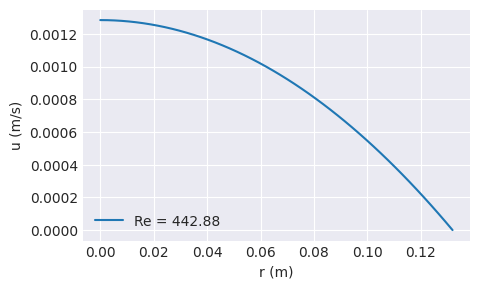

In [8]:
fig = plt.figure(figsize=(5,3))
indx = np.random.randint(data_v.shape[0]-1)

with plt.style.context("seaborn-v0_8-darkgrid"):
  ax = fig.add_subplot(111)
  ax.plot(data_r.iloc[indx,:], data_v.iloc[indx,4:], label=f"Re = {data_Re.iloc[indx].values[0]:1.2f}")
  ax.legend(loc="lower left")
  ax.set_xlabel("r (m)")
  ax.set_ylabel("u (m/s)")

Let's study the data and its correlation

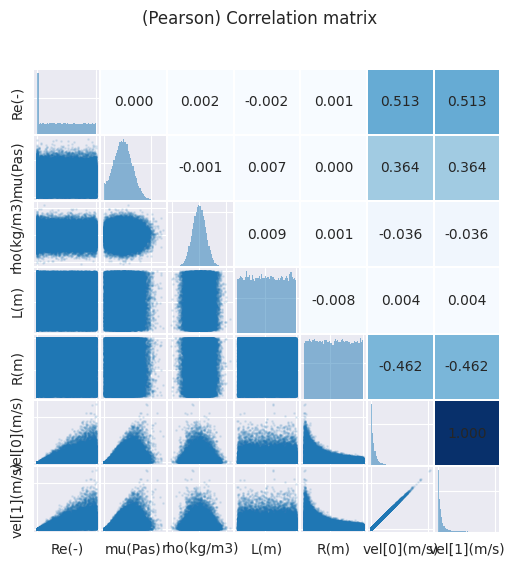

In [9]:
# Correlation matrix plot

Nbins = 50
fig = plt.figure(figsize=(6,6))
label = ["Re(-)", "mu(Pas)", "rho(kg/m3)", "L(m)", "R(m)", "vel[0](m/s)", "vel[1](m/s)"]
N = len(label)
corr_matrix = data_all.corr()
with plt.style.context("seaborn-v0_8-darkgrid"):
  gird = fig.add_gridspec(N, N, wspace=0.03, hspace=0.03)
  ax = []
  cmap = plt.get_cmap('Blues')
  for i in range(N):
    for j in range(N):
      ax.append(fig.add_subplot(gird[i,j]))
      if j < i:
        ax[-1].scatter(data_all[label[j]], data_all[label[i]], s=1, alpha=.1)
      elif j > i:
        corr = corr_matrix.loc[label[j], label[i]]
        ax[-1].text(.5, 0.5, f"{corr:1.3f}", ha="center", va="center")
        ax[-1].set_facecolor(cmap(np.abs(corr)))
        ax[-1].set_xticks([])
        ax[-1].set_yticks([])
      else:
        ax[-1].hist(data_all[label[i]], bins=Nbins, alpha=.5)
      if j == 0  or i == N-1:
        if j == 0  and i != N-1:
          ax[-1].set_ylabel(label[i])
          ax[-1].set_xticklabels([])
        elif i == N-1 and j != 0:
          ax[-1].set_xlabel(label[j])
          ax[-1].set_yticklabels([])
        else:
          ax[-1].set_ylabel(label[i])
          ax[-1].set_xlabel(label[j])
      ax[-1].set_xticklabels([])
      ax[-1].set_yticklabels([])
  fig.suptitle("(Pearson) Correlation matrix")
plt.show()

## Split database

80,000 is too many; let's reduce it to 5,000 by randomly selecting from the entire database.



In [10]:
Nall = data_v.shape[0]
Nsmall = 5000

rand_gen = np.random.default_rng(seed=1234)
indx = rand_gen.choice(np.arange(Nall), size=Nsmall, replace=False)

data_v_small = data_v.iloc[indx, :]
data_Re_small = data_Re.iloc[indx, :]

let's store it

In [11]:
data_v_small.to_csv("small-data.csv", index=False)
data_Re_small.to_csv("small-Re.csv", index=False)

## Model 1

We are going to use our model for binary classification, specifically to distinguish between turbulent and non-turbulent conditions. It's important to note that in the context of our database, "non-turbulent" refers to laminar conditions, although in reality, laminar flow isn't always the case.


### Setup database

We load the *features* and the *labels* of our first model

In [12]:
features = pd.read_csv("small-data.csv", index_col=False).iloc[:,4:] # note: we drop the first 4 colomns to study only the velocity profile
label = pd.read_csv("small-Re.csv", index_col=False)


In [13]:
features.head()

,vel[0](m/s),vel[1](m/s),vel[2](m/s),vel[3](m/s),vel[4](m/s),vel[5](m/s),vel[6](m/s),vel[7](m/s),vel[8](m/s),vel[9](m/s),...,vel[40](m/s),vel[41](m/s),vel[42](m/s),vel[43](m/s),vel[44](m/s),vel[45](m/s),vel[46](m/s),vel[47](m/s),vel[48](m/s),vel[49](m/s)
0,1.067542,1.065017,1.062446,1.059825,1.057153,1.054429,1.051649,1.048811,1.045913,1.042951,...,0.878768,0.866962,0.853770,0.838790,0.821411,0.800631,0.774614,0.739374,0.682805,0.0
1,0.099708,0.099392,0.099069,0.098741,0.098407,0.098067,0.097719,0.097365,0.097004,0.096635,...,0.076775,0.075392,0.073856,0.072120,0.070120,0.067748,0.064808,0.060879,0.054706,0.0
2,0.331809,0.330939,0.330054,0.329152,0.328233,0.327296,0.326340,0.325365,0.324369,0.323351,...,0.267457,0.263479,0.259041,0.254010,0.248185,0.241238,0.232568,0.220875,0.202231,0.0
3,4.654438,4.642508,4.630359,4.617982,4.605366,4.592503,4.579381,4.565989,4.552315,4.538346,...,3.769371,3.714517,3.653293,3.583869,3.503460,3.407497,3.287648,3.125854,2.867489,0.0
4,0.000371,0.000371,0.000370,0.000369,0.000368,0.000367,0.000365,0.000363,0.000361,0.000358,...,0.000124,0.000111,0.000098,0.000085,0.000072,0.000058,0.000044,0.000030,0.000015,-0.0


In [14]:
label.head()

,Re(-)
0,776550.104000
1,50171.564400
2,299778.741000
3,367642.557000
4,953.246478


Now we convert the labels from numerical (`float`) into boolean (`bool`), where:

 * `True` when the flow is turbulent
 * `False` whein the flow is non-turbulent

In [15]:
labels_Re = label.pop('Re(-)')
label['Turbolent'] = (labels_Re > 2000)

In [16]:
label.head()

,Turbolent
0,True
1,True
2,True
3,True
4,False


Now we split the training and test set (with ratio 80/20)



In [17]:
label_train = label.iloc[1000:, :]
label_test = label.iloc[:1000, :]
features_train = features.iloc[1000:, :]
features_test = features.iloc[:1000, :]
# the Re number will be useful later
labels_Re_train = labels_Re.iloc[1000:]
labels_Re_test = labels_Re.iloc[:1000]

Storing

In [18]:
pathlib.Path("model_1").mkdir(parents=True, exist_ok=True) # make a folder
# make train and test subfolder
pathlib.Path(os.path.join("model_1","train")).mkdir(exist_ok=True)
pathlib.Path(os.path.join("model_1","test")).mkdir(exist_ok=True)
# storin
label_train.to_csv(os.path.join("model_1","train", "label.csv"), index=False)
label_test.to_csv(os.path.join("model_1","test", "label.csv"), index=False)
features_train.to_csv(os.path.join("model_1","train", "features.csv"), index=False)
features_test.to_csv(os.path.join("model_1","test", "features.csv"), index=False)


### Build the model with **Keras** and **TensorFlow**

In [19]:
def model_1(n_cols):
  model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(n_cols,), name='in'),
    tf.keras.layers.Dense(32, activation='relu', name='h1'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='out')
  ])
  return model

Let us call the function and build the model

In [20]:
model = model_1(features.shape[1])

And let us see if if is all in order

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 32)                1632      
                                                                 
 out (Dense)                 (None, 1)                 33        
                                                                 
Total params: 1665 (6.50 KB)
Trainable params: 1665 (6.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


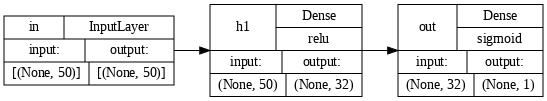

In [22]:
tf.keras.utils.plot_model(model = model , rankdir="LR", dpi=72, show_shapes=True, show_layer_activations=True)

### Model compile

Now we have to "compile" the model. Which means choose the loss fanction, the traingin strategy and optimizer (and learning rate), and the right metrics for the evaulation.

* **Loss Function**: it is the critera by which to evaluate the accuracy of the model. The traing goal is to minimize this function. For this case we choose the Sparse Categorical Crossentropy

* **Optimizer**: It defines the model weights serchin criteria to minimize the loss function. In this tutotrial we choose the common Adam

* **Metrics**: It the wey yo evaulate the goodness of the model. For this kind of model usualy we choose the Accuracy

In [23]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2,
                                     beta_1=0.9,
                                     beta_2=0.999,
                                     epsilon=1e-08)
loss= tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics=[
    tf.keras.metrics.Accuracy(),
    tf.keras.metrics.BinaryAccuracy(threshold=0.5),
]

model.compile(
    optimizer,
    loss,
    metrics,
)

### Training

In [24]:
batch_size = 512
epochs = 100

In [25]:
history = model.fit(
    np.array(features_train), # before to feed the data we convert it into an array
    np.array(label_train).astype('float'),
    batch_size,
    epochs,
    validation_data=(np.array(features_test), np.array(label_test).astype('float')), # test-set
    verbose = 1, # 0 = silent, 1 = progress bar, 2 = one line per epoch
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8/8 [==============================] - 2s 48ms/step - loss: 0.2663 - accuracy: 0.0370 - binary_accuracy: 0.9137 - val_loss: 0.1545 - val_accuracy: 0.1070 - val_binary_accuracy: 0.9000
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 0.1416 - accuracy: 0.1587 - binary_accuracy: 0.9000 - val_loss: 0.1287 - val_accuracy: 0.2010 - val_binary_accuracy: 0.9000
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1244 - accuracy: 0.2422 - binary_accuracy: 0.9000 - val_loss: 0.1169 - val_accuracy: 0.2740 - val_binary_accuracy: 0.9000
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.1143 - accuracy: 0.3013 - binary_accuracy: 0.9000 - val_loss: 0.1070 - val_accuracy: 0.3190 - val_binary_accuracy: 0.9100
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 0.1045 - accuracy: 0.3445 - binary_accuracy: 0.9630 - val_loss: 0.0969 - val_accuracy: 0.3480 - val_binary_accuracy: 0.9900
Epoch 6/100
8/8 [=================

Now we plot the training

In [26]:
# Plot traing loop
train_binary_accuracy = np.array(history.history['binary_accuracy'])
test_binary_accuracy = np.array(history.history['val_binary_accuracy'])
train_loss = np.array(history.history['loss'])
test_loss = np.array(history.history['val_loss'])


epochs_i = np.arange(1,train_loss.shape[0]+1)

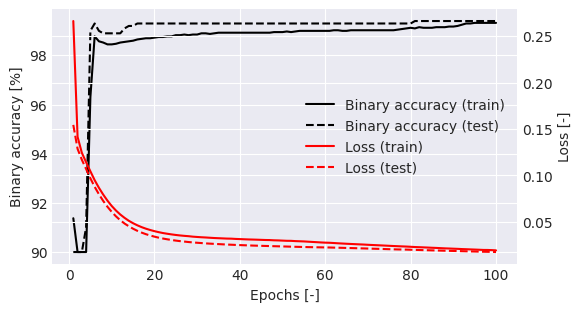

In [27]:
fig = plt.figure(figsize=(6,3.3))
with plt.style.context("seaborn-v0_8-darkgrid"):
  ax = fig.add_subplot(111)
  ax_twin = ax.twinx()
  a1 = ax.plot(epochs_i, train_binary_accuracy*100, color='k', ls='-', label='Binary accuracy (train)')
  a2 = ax.plot(epochs_i, test_binary_accuracy*100, color='k', ls='--', label='Binary accuracy (test)')
  l1 = ax_twin.plot(epochs_i, train_loss, color='r', ls='-', label='Loss (train)')
  l2 = ax_twin.plot(epochs_i, test_loss, color='r', ls='--', label='Loss (test)')
  ax.set_xlabel('Epochs [-]')
  ax.set_ylabel('Binary accuracy [%]')
  ax_twin.set_ylabel('Loss [-]')
  ax_twin.legend(a1+a2+l1+l2, ['Binary accuracy (train)', 'Binary accuracy (test)', 'Loss (train)', 'Loss (test)'], loc='center right')
plt.show()

Now we compere the prediction respect the Reynolds number

In [28]:
predictions = model.predict(np.array(features_test))

32/32 [==============================] - 0s 1ms/step


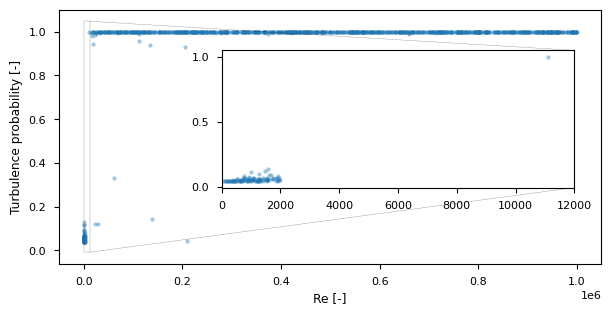

In [29]:
fig = plt.figure(figsize=(7,3.3))
with plt.style.context("seaborn-v0_8-paper"):
  ax = fig.add_subplot(111)
  axins = ax.inset_axes([0.3, 0.3, 0.65, 0.54])
  ax.scatter(labels_Re_test, predictions, s=7, alpha=.4)
  axins.scatter(labels_Re_test, predictions, s=7, alpha=.4)
  axins.set_xlim([0, 12000])
  ax.indicate_inset_zoom(axins, edgecolor="black")
  ax.set_xlabel('Re [-]')
  ax.set_ylabel('Turbulence probability [-]')

### What if we increse the model depth

We are going to add a second hiden layer

In [35]:
def model_1_v1(n_cols):
  model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(n_cols,), name='in'),
    tf.keras.layers.Dense(32, activation='relu', name='h1'),
    tf.keras.layers.Dense(32, activation='relu', name='h2'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='out')
  ])
  return model

Let us call the function and build the model

In [36]:
model_v1 = model_1_v1(features.shape[1])

And let us see if if is all in order

In [37]:
model_v1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 32)                1632      
                                                                 
 h2 (Dense)                  (None, 32)                1056      
                                                                 
 out (Dense)                 (None, 1)                 33        
                                                                 
Total params: 2721 (10.63 KB)
Trainable params: 2721 (10.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


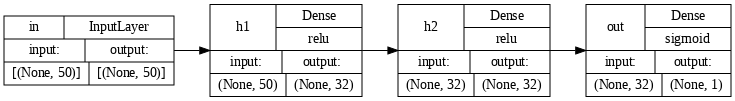

In [38]:
tf.keras.utils.plot_model(model = model_v1 , rankdir="LR", dpi=72, show_shapes=True, show_layer_activations=True)

Now we compile the model

In [39]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2,
                                     beta_1=0.9,
                                     beta_2=0.999,
                                     epsilon=1e-08)
loss= tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics=[
    tf.keras.metrics.Accuracy(),
    tf.keras.metrics.BinaryAccuracy(threshold=0.5),
]

model_v1.compile(
    optimizer,
    loss,
    metrics,
)

Training

In [40]:
batch_size = 512
epochs = 100

In [41]:
history_v1 = model_v1.fit(
    np.array(features_train), # before to feed the data we convert it into an array
    np.array(label_train).astype('float'),
    batch_size,
    epochs,
    validation_data=(np.array(features_test), np.array(label_test).astype('float')), # test-set
    verbose = 1, # 0 = silent, 1 = progress bar, 2 = one line per epoch
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8/8 [==============================] - 1s 30ms/step - loss: 0.2006 - accuracy: 0.1170 - binary_accuracy: 0.9000 - val_loss: 0.1172 - val_accuracy: 0.3310 - val_binary_accuracy: 0.9000
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 0.1091 - accuracy: 0.4435 - binary_accuracy: 0.9000 - val_loss: 0.0938 - val_accuracy: 0.5330 - val_binary_accuracy: 0.9000
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0870 - accuracy: 0.5788 - binary_accuracy: 0.9617 - val_loss: 0.0722 - val_accuracy: 0.6110 - val_binary_accuracy: 0.9930
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0683 - accuracy: 0.6410 - binary_accuracy: 0.9858 - val_loss: 0.0554 - val_accuracy: 0.6630 - val_binary_accuracy: 0.9920
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0527 - accuracy: 0.6783 - binary_accuracy: 0.9865 - val_loss: 0.0412 - val_accuracy: 0.6980 - val_binary_accuracy: 0.9930
Epoch 6/100
8/8 [===================

Now we plot the training

In [42]:
# Plot traing loop
train_binary_accuracy_v1 = np.array(history_v1.history['binary_accuracy'])
test_binary_accuracy_v1 = np.array(history_v1.history['val_binary_accuracy'])
train_loss_v1 = np.array(history_v1.history['loss'])
test_loss_v1 = np.array(history_v1.history['val_loss'])


epochs_i = np.arange(1,train_loss_v1.shape[0]+1)

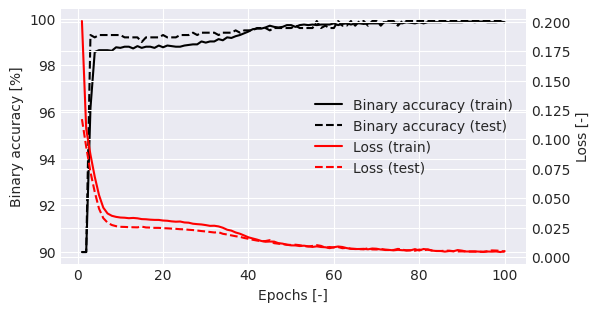

In [43]:
fig = plt.figure(figsize=(6,3.3))
with plt.style.context("seaborn-v0_8-darkgrid"):
  ax = fig.add_subplot(111)
  ax_twin = ax.twinx()
  a1 = ax.plot(epochs_i, train_binary_accuracy_v1*100, color='k', ls='-', label='Binary accuracy (train)')
  a2 = ax.plot(epochs_i, test_binary_accuracy_v1*100, color='k', ls='--', label='Binary accuracy (test)')
  l1 = ax_twin.plot(epochs_i, train_loss_v1, color='r', ls='-', label='Loss (train)')
  l2 = ax_twin.plot(epochs_i, test_loss_v1, color='r', ls='--', label='Loss (test)')
  ax.set_xlabel('Epochs [-]')
  ax.set_ylabel('Binary accuracy [%]')
  ax_twin.set_ylabel('Loss [-]')
  ax_twin.legend(a1+a2+l1+l2, ['Binary accuracy (train)', 'Binary accuracy (test)', 'Loss (train)', 'Loss (test)'], loc='center right')
plt.show()

Now we compere the prediction respect the Reynolds number

In [44]:
predictions_v1 = model.predict(np.array(features_test))

32/32 [==============================] - 0s 1ms/step


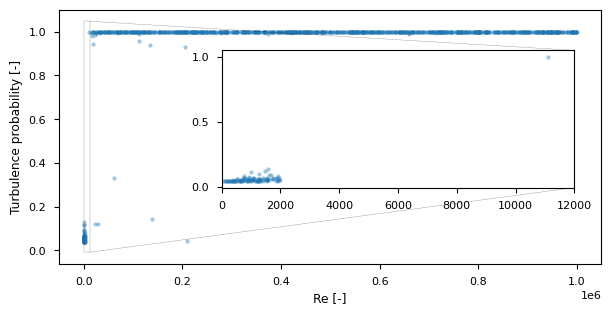

In [45]:
fig = plt.figure(figsize=(7,3.3))
with plt.style.context("seaborn-v0_8-paper"):
  ax = fig.add_subplot(111)
  axins = ax.inset_axes([0.3, 0.3, 0.65, 0.54])
  ax.scatter(labels_Re_test, predictions_v1, s=7, alpha=.4)
  axins.scatter(labels_Re_test, predictions_v1, s=7, alpha=.4)
  axins.set_xlim([0, 12000])
  ax.indicate_inset_zoom(axins, edgecolor="black")
  ax.set_xlabel('Re [-]')
  ax.set_ylabel('Turbulence probability [-]')

In [62]:
conf_matrix = tf.math.confusion_matrix(predictions=np.squeeze(predictions_v1 > .5), labels=np.squeeze(np.array(label_test).astype(bool))).numpy

In [63]:
conf_matrix

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,   0],
       [  6, 894]], dtype=int32)>>

In [149]:
def compute_confusion_matrix(labels, predicted):
    """
    Compute the confusion matrix and return its elements along with the indices of TP, TN, FP, and FN.

    Args:
    labels (array-like): The actual binary classification labels (0 or 1).
    predicted (array-like): The predicted binary classification labels (0 or 1).

    Returns:
    confusion_matrix (numpy.ndarray): The 2x2 confusion matrix.
    TP_indices (list): Indices of True Positives (TP)
    TN_indices (list): Indices of True Negatives (TN)
    FP_indices (list): Indices of False Positives (FP)
    FN_indices (list): Indices of False Negatives (FN)
    """
    if len(labels) != len(predicted):
        raise ValueError("Input arrays must have the same length.")

    confusion_matrix = np.zeros((2, 2), dtype=int)
    TP_indices, TN_indices, FP_indices, FN_indices = [], [], [], []

    for i, (l, p) in enumerate(zip(labels, predicted)):
        confusion_matrix[l][p] += 1
        if l == 1 and p == 1:
            TP_indices.append(i)
        elif l == 0 and p == 0:
            TN_indices.append(i)
        elif l == 0 and p == 1:
            FP_indices.append(i)
        elif l == 1 and p == 0:
            FN_indices.append(i)

    return confusion_matrix, TP_indices, TN_indices, FP_indices, FN_indices

def plot_conf_matrix(ax, confusion_matrix, class_names, cmap):
  conf_matrix_perc = (confusion_matrix.T / confusion_matrix.sum(axis=1)).T * 100.0
  cm = ax.imshow(conf_matrix_perc, interpolation='nearest', cmap=cmap)
  ax.set_title('Confusion Matrix')
  plt.colorbar(cm)

  tick_marks = np.arange(len(class_names))
  ax.set_xticks(tick_marks, class_names)
  ax.set_yticks(tick_marks, class_names)
  ax.yaxis.set_tick_params(rotation=90)
  for i in range(len(class_names)):
      for j in range(len(class_names)):
          ax.text(j, i, f"{conf_matrix_perc[i, j]:3.2f} %", horizontalalignment="center", color="k")

  ax.set_ylabel('True label')
  ax.set_xlabel('Predicted label')

In [150]:
conf_matrix, i_TP, i_TN, i_FP, i_FN = compute_confusion_matrix(np.squeeze(np.array(label_test).astype(int)), np.squeeze(predictions_v1 > .5).astype(int))

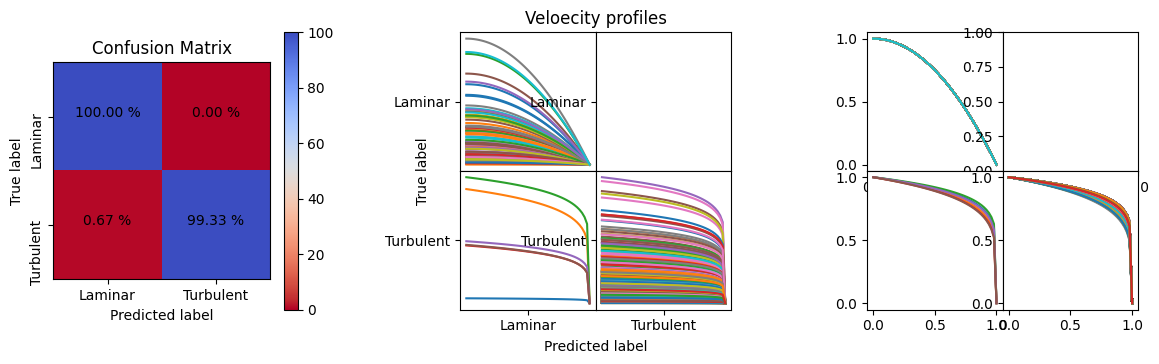

In [151]:
fig = plt.figure(figsize=(14,3.6))
gird = fig.add_gridspec(2, 8, wspace=0.0, hspace=0.0)
ax_cm = fig.add_subplot(gird[:, :2])
plot_conf_matrix(ax_cm, conf_matrix, ["Laminar", "Turbulent"], 'coolwarm_r')
ax_cm_p = []
for i in range(2):
  ax_ = []
  for j in range(2):
    ax_.append(fig.add_subplot(gird[i, j+3]))
  ax_cm_p.append(ax_)

ax_cm_pn = []
for i in range(2):
  ax_ = []
  for j in range(2):
    ax_.append(fig.add_subplot(gird[i, j+6]))
  ax_cm_pn.append(ax_)

cm_i = [[i_TN, i_FP],
        [i_FN, i_TP]]
r = np.linspace(0,1, features_test.shape[1])
class_naemes = ["Laminar", "Turbulent"]
for i in range(2):
  for j in range(2):
    for k in cm_i[i][j]:
      ax_cm_p[i][j].plot(r, features_test.iloc[k, :])
    ax_cm_p[i][j].set_yticks([np.mean(ax_cm_p[i][j].get_ylim())], [class_naemes[i]])
    ax_cm_p[i][j].set_xticks([np.mean(ax_cm_p[i][j].get_xlim())], [class_naemes[j]])
ax.set_ylabel('True label')
ax_cm_p[0][0].set_ylabel('True label')
ax_cm_p[1][1].set_xlabel('Predicted label')
ax_cm_p[0][0].yaxis.set_label_coords(-0.22, 0.0, transform=ax_cm_p[0][0].transAxes)
ax_cm_p[1][1].xaxis.set_label_coords(0.0, -0.22, transform=ax_cm_p[1][1].transAxes)
ax_cm_p[0][0].set_title("Veloecity profiles", loc='right', fontdict={'ha': 'center'})



for i in range(2):
  for j in range(2):
    for k in cm_i[i][j]:
      ax_cm_pn[i][j].plot(r, features_test.iloc[k, :]/features_test.iloc[k, 0])

plt.show()

In [152]:
help(ax.yaxis.set_tick_params)

Help on method set_tick_params in module matplotlib.axis:

set_tick_params(which='major', reset=False, **kwargs) method of matplotlib.axis.YAxis instance
    Set appearance parameters for ticks, ticklabels, and gridlines.
    
    For documentation of keyword arguments, see
    :meth:`matplotlib.axes.Axes.tick_params`.
    
    See Also
    --------
    .Axis.get_tick_params
        View the current style settings for ticks, ticklabels, and
        gridlines.



In [155]:
ax.yaxis.get_tick_params()

{'left': True,
 'right': False,
 'labelleft': True,
 'labelright': False,
 'gridOn': False}

In [84]:
6/900

0.006666666666666667